## Data Collection and cleaning

Q.1 Take your home town. Choose any 4 colonies and get their latitude and longitude automatically. Ensure their values are appropriate.

In [1]:
# Your code goes here
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
coordinate=[]
def getLocation():
    driver=webdriver.Chrome(r'F:\Tools\Chrome Driver\chromedriver.exe')
    driver.get("https://www.latlong.net/")
    colony_name=['E-3, Arera Colony, Bhopal','Char Imli, Bhopal','E-2, Arera Colony, Bhopal','E-6, Arera Colony, Bhopal']
    for i in colony_name:
        search = driver.find_element_by_xpath('//*[@id="place"]')
        search.clear()
        search.send_keys(i)
        search.submit()
        time.sleep(2)
        latlong = driver.find_element_by_xpath('//*[@id="latlngspan"]')
        latlong=latlong.text
        coordinate.append(latlong)
    driver.quit()
    return (colony_name,coordinate)
getLocation()

(['E-3, Arera Colony, Bhopal',
  'Char Imli, Bhopal',
  'E-2, Arera Colony, Bhopal',
  'E-6, Arera Colony, Bhopal'],
 ['(23.216740, 77.436043)',
  '(23.231371, 77.415741)',
  '(23.217600, 77.436813)',
  '(23.217770, 77.439491)'])

## Linear Regression

Take dataset from  https://archive.ics.uci.edu/ml/datasets/Gas+sensor+array+under+dynamic+gas+mixtures
OR
ftp://10.1.32.7/pub/resources/DataScience/Datasets/GasMixture/

You will be working on ethylene_methane.txt file only.

If your seedNo%100 is 0, take first 40000 rows for this question, if it is 1, then take next 40000 rows for this question, and so on.

Q.1 Fit a linear model to predict ethylene concentration. Every other feature becomes independent feature.

In [0]:
# Your Code goes here


Q.2 Draw chart of # of iteration vs loss/cost function.

In [0]:
# Your Code goes here


Q.3 Perform testing and validation.

In [0]:
# Your Code goes here


Q.4 Perform K fold testing. Take K appropriately.

In [0]:
# Your Code goes here


## Clustering

Download dataset from ftp://10.1.32.7/pub/resources/DataScience/Datasets/MNIST/ 
OR
http://yann.lecun.com/exdb/mnist/

Your seedNo%10 decides which pair of digits you will be working on. If seedNo%10 is 0, then take samples of 0 and 1, if it is 1, then take samples of 1 and 2, and so on.



Q.1 Compute two features 1. Average intensity, and 2. Vertical symmetry. Draw a scatter plot of of these two set of points with newly computed features only. 

F:\Tools\Anaconda\envs\TensorFlow-GPU\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
F:\Tools\Anaconda\envs\TensorFlow-GPU\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


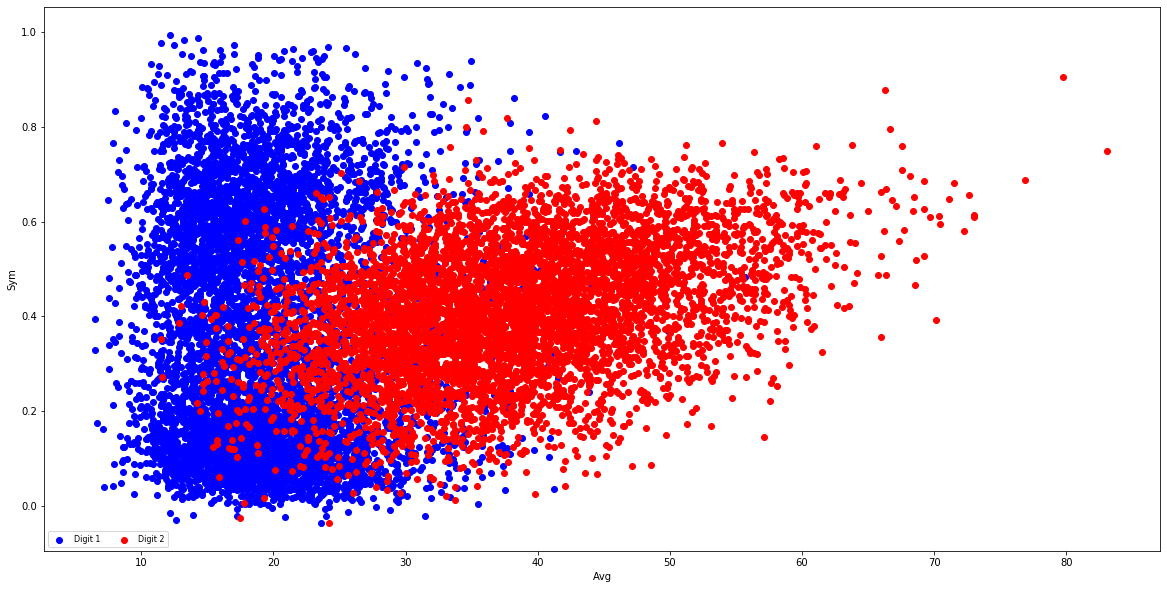

In [3]:
# Your Code goes here
import idx2numpy
import numpy as np
file = './Cluster Data/train-images.idx3-ubyte'
arr = idx2numpy.convert_from_file(file)
labl = './Cluster Data/train-labels.idx1-ubyte'
lbarr = idx2numpy.convert_from_file(labl)
my_data = []
my_lables = []

for i in range(len(lbarr)):
    if(lbarr[i]==1 or lbarr[i]==2):
        my_lables.append(lbarr[i])
        my_data.append(arr[i])

my_lables = np.asarray(my_lables)
my_data = np.asarray(my_data)

avg = []
for data in my_data:
    avg.append(np.mean(data))
avg = np.asarray(avg)

cor = []
for data in my_data:
    cor.append(np.corrcoef([data[:,:14].flatten(), np.flip(data[:,14:],axis=1).flatten()])[0][1])
cor = np.asarray(cor)

a1 = []
s1 = []
a2 = []
s2 = []
for i in range(len(my_lables)):
    if my_lables[i]==1:
        a1.append(avg[i])
        s1.append(cor[i])
    elif my_lables[i]==2:
        a2.append(avg[i])
        s2.append(cor[i])

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.xlabel('Avg')
plt.ylabel('Sym')
d1 = plt.scatter(a1,s1,color='blue')
d2 = plt.scatter(a2,s2,color='red')
plt.legend((d1, d2), ('Digit 1', 'Digit 2'), scatterpoints=1, loc='lower left', ncol=3, fontsize=8)

Q.2
Perform K-means clustring. Draw clusters and their centroids. Draw elbow chart. what should be the best value of K for your dataset?

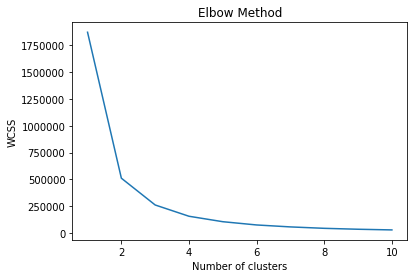

In [4]:
# Your Code goes here
for i in range(len(cor)):
    if np.isnan(cor[i]):
        cor[i] = 0

ls=[]
for i in range(len(cor)):
    ls.append((avg[i],cor[i]))
    
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(ls)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

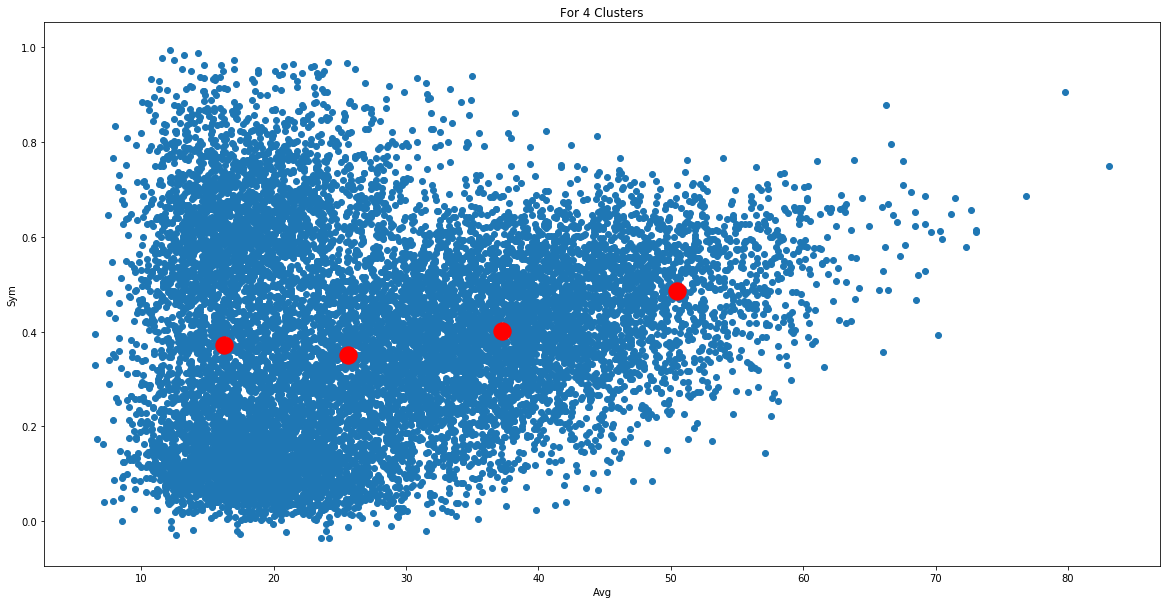

In [10]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(ls)
plt.figure(figsize=(20,10))
plt.xlabel('Avg')
plt.ylabel('Sym')
plt.title('For 4 Clusters')
plt.scatter(avg, cor)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

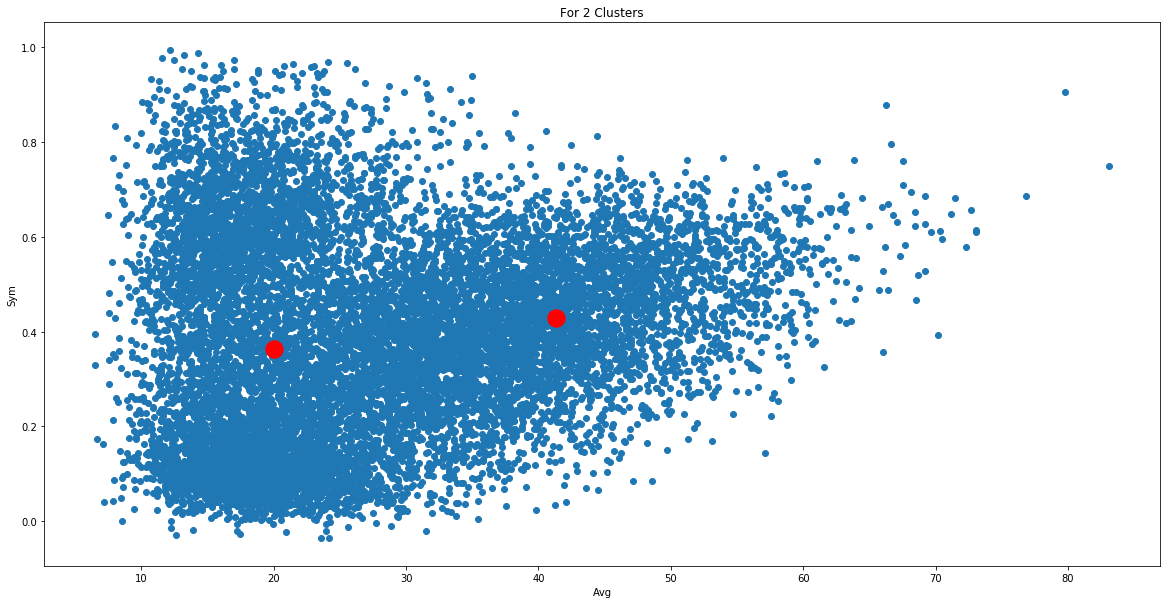

In [9]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(ls)
plt.figure(figsize=(20,10))
plt.xlabel('Avg')
plt.ylabel('Sym')
plt.title('For 2 Clusters')
plt.scatter(avg, cor)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Q.3 Can clustering be used for classification in your dataset? If yes, how accurate it is?

In [0]:
# Your Code goes here


Q.4 Come up with any new feature so that accuracy of classification (through clustring) improves. Draw clusters and their centroids.

In [0]:
# Your Code goes here
